Python Final Project CS661 -> Bird Migration EDA and Predictor -> Monalisa Mondal

In [163]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

df = pd.read_csv("/Users/Monalisa/Downloads/bird_migration_data.csv")


In [165]:
df.head()

Bird_ID  Species         Region    Habitat Weather_Condition  \
0   B1000  Warbler  South America  Grassland            Stormy   
1   B1001    Stork  North America  Grassland            Stormy   
2   B1002     Hawk  South America   Mountain            Stormy   
3   B1003  Warbler  South America      Urban            Stormy   
4   B1004    Crane         Europe      Urban             Windy   

  Migration_Reason  Start_Latitude  Start_Longitude  End_Latitude  \
0          Feeding       11.906566      -169.378251     30.377647   
1         Breeding       62.301546      -111.475069     39.921092   
2  Avoid Predators       87.861164       -78.727327     66.990980   
3   Climate Change       35.770590       153.104341    -49.003145   
4  Avoid Predators      -21.611614       106.674824     11.681051   

   End_Longitude  ...  Tracking_Quality  Migration_Interrupted  \
0     -21.366879  ...         Excellent                    Yes   
1      47.963436  ...              Good                    Yes   
2      19.448466  ...              Fair                     No   
3    -157.868744  ...              Good                    Yes   
4    -115.022863  ...              Good                     No   

   Interrupted_Reason     Tagged_By  Tag_Weight_g  Migration_Success  \
0               Storm  Researcher_A          27.0             Failed   
1              Injury  Researcher_C          14.2         Successful   
2         Lost Signal  Researcher_B          16.1             Failed   
3         Lost Signal  Researcher_C          24.4         Successful   
4                 NaN  Researcher_B          25.8             Failed   

   Recovery_Location_Known  Recovery_Time_days  Observation_Counts  \
0                       No                 102                  56   
1                      Yes                 118                  61   
2                       No                  41                  71   
3                       No                  15                  68   
4                      Yes                  73                  67   

   Observation_Quality  
0                  Low  
1                  Low  
2                 High  
3                  Low  
4             Moderate  

[5 rows x 41 columns]

In [167]:
df.isnull().sum()

Bird_ID                       0
Species                       0
Region                        0
Habitat                       0
Weather_Condition             0
Migration_Reason              0
Start_Latitude                0
Start_Longitude               0
End_Latitude                  0
End_Longitude                 0
Flight_Distance_km            0
Flight_Duration_hours         0
Average_Speed_kmph            0
Max_Altitude_m                0
Min_Altitude_m                0
Temperature_C                 0
Wind_Speed_kmph               0
Humidity_%                    0
Pressure_hPa                  0
Visibility_km                 0
Nesting_Success               0
Tag_Battery_Level_%           0
Signal_Strength_dB            0
Migration_Start_Month         0
Migration_End_Month           0
Rest_Stops                    0
Predator_Sightings            0
Tag_Type                      0
Migrated_in_Flock             0
Flock_Size                    0
Food_Supply_Level             0
Tracking

In [169]:
df["Interrupted_Reason"]

0             Storm
1            Injury
2       Lost Signal
3       Lost Signal
4               NaN
           ...     
9995       Predator
9996       Predator
9997    Lost Signal
9998    Lost Signal
9999    Lost Signal
Name: Interrupted_Reason, Length: 10000, dtype: object

In [171]:
df.columns

Index(['Bird_ID', 'Species', 'Region', 'Habitat', 'Weather_Condition',
       'Migration_Reason', 'Start_Latitude', 'Start_Longitude', 'End_Latitude',
       'End_Longitude', 'Flight_Distance_km', 'Flight_Duration_hours',
       'Average_Speed_kmph', 'Max_Altitude_m', 'Min_Altitude_m',
       'Temperature_C', 'Wind_Speed_kmph', 'Humidity_%', 'Pressure_hPa',
       'Visibility_km', 'Nesting_Success', 'Tag_Battery_Level_%',
       'Signal_Strength_dB', 'Migration_Start_Month', 'Migration_End_Month',
       'Rest_Stops', 'Predator_Sightings', 'Tag_Type', 'Migrated_in_Flock',
       'Flock_Size', 'Food_Supply_Level', 'Tracking_Quality',
       'Migration_Interrupted', 'Interrupted_Reason', 'Tagged_By',
       'Tag_Weight_g', 'Migration_Success', 'Recovery_Location_Known',
       'Recovery_Time_days', 'Observation_Counts', 'Observation_Quality'],
      dtype='object')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bird_ID                  10000 non-null  object 
 1   Species                  10000 non-null  object 
 2   Region                   10000 non-null  object 
 3   Habitat                  10000 non-null  object 
 4   Weather_Condition        10000 non-null  object 
 5   Migration_Reason         10000 non-null  object 
 6   Start_Latitude           10000 non-null  float64
 7   Start_Longitude          10000 non-null  float64
 8   End_Latitude             10000 non-null  float64
 9   End_Longitude            10000 non-null  float64
 10  Flight_Distance_km       10000 non-null  float64
 11  Flight_Duration_hours    10000 non-null  float64
 12  Average_Speed_kmph       10000 non-null  float64
 13  Max_Altitude_m           10000 non-null  int64  
 14  Min_Altitude_m         

In [175]:
df.describe()

Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  \
count    10000.000000     10000.000000  10000.000000   10000.000000   
mean        -0.321812        -0.394588      0.084391       0.467617   
std         51.919190       104.083440     51.709437     103.438134   
min        -89.999003      -179.993975    -89.998482    -179.902756   
25%        -45.390697       -91.444680    -43.664719     -88.871564   
50%         -0.138849        -0.479892     -0.163116       1.280823   
75%         44.480926        89.640253     44.957102      91.196076   
max         89.980302       179.989973     89.989145     179.955036   

       Flight_Distance_km  Flight_Duration_hours  Average_Speed_kmph  \
count        10000.000000           10000.000000        10000.000000   
mean          2504.036134              49.994020           49.953394   
std            499.723298              10.026108            5.085296   
min            527.700000              12.600000           30.430000   
25%           2169.632500              43.200000           46.530000   
50%           2511.150000              50.050000           50.040000   
75%           2841.452500              56.800000           53.360000   
max           4428.320000              91.000000           68.950000   

       Max_Altitude_m  Min_Altitude_m  Temperature_C  ...  Pressure_hPa  \
count     10000.00000    10000.000000   10000.000000  ...  10000.000000   
mean       5504.80830      500.111800      12.566930  ...   1000.440810   
std        2595.28577      229.782907      13.073405  ...     28.959614   
min        1000.00000      100.000000     -10.000000  ...    950.000000   
25%        3277.75000      300.000000       1.200000  ...    975.000000   
50%        5521.00000      501.000000      12.500000  ...   1000.950000   
75%        7740.25000      698.000000      24.000000  ...   1025.500000   
max        9999.00000      899.000000      35.000000  ...   1050.000000   

       Visibility_km  Tag_Battery_Level_%  Signal_Strength_dB    Rest_Stops  \
count   10000.000000         10000.000000          10000.0000  10000.000000   
mean       10.636970            54.651800            -69.8408      7.380000   
std         5.504623            25.839271              9.9189      4.023583   
min         1.000000            10.000000           -107.9000      1.000000   
25%         5.900000            32.000000            -76.6000      4.000000   
50%        10.700000            55.000000            -69.8000      7.000000   
75%        15.400000            77.000000            -63.1000     11.000000   
max        20.000000            99.000000            -33.3000     14.000000   

       Predator_Sightings    Flock_Size  Tag_Weight_g  Recovery_Time_days  \
count        10000.000000  10000.000000  10000.000000        10000.000000   
mean             4.490200    248.714500     17.605870           60.490800   
std              2.872826    144.943771      7.200088           34.434028   
min              0.000000      1.000000      5.000000            1.000000   
25%              2.000000    124.000000     11.400000           31.000000   
50%              5.000000    248.000000     17.700000           61.000000   
75%              7.000000    376.000000     24.000000           91.000000   
max              9.000000    499.000000     30.000000          119.000000   

       Observation_Counts  
count        10000.000000  
mean            49.872800  
std             28.601997  
min              1.000000  
25%             25.000000  
50%             50.000000  
75%             74.000000  
max             99.000000  

[8 rows x 22 columns]

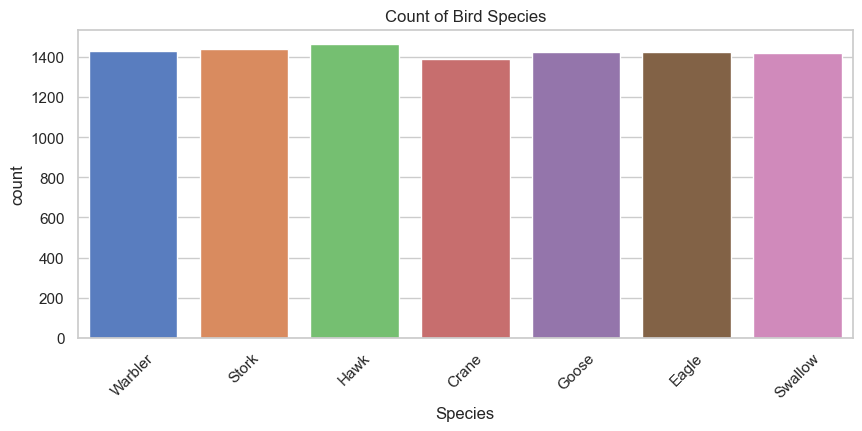

In [177]:
# Set style
sns.set(style="whitegrid")

# ===== UNIVARIATE ANALYSIS =====

# 1. Species distribution
if 'Species' in df.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x='Species', data=df, palette='muted')
    plt.title('Count of Bird Species')
    plt.xticks(rotation=45)
    plt.savefig('species_count.png')
    plt.show()
else:
    print('Species column not found in the data.')

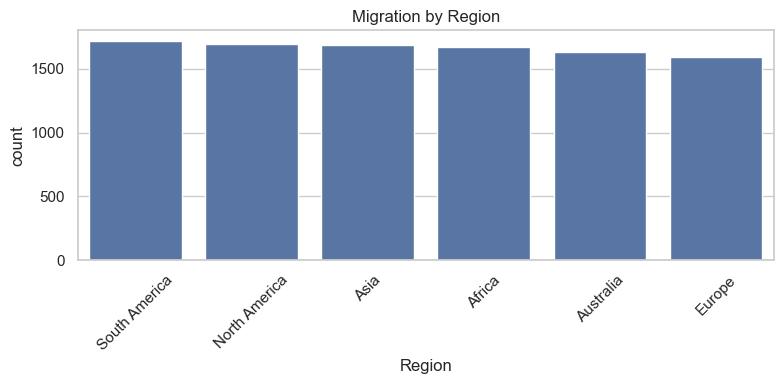

In [179]:
# 2. Region distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Migration by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


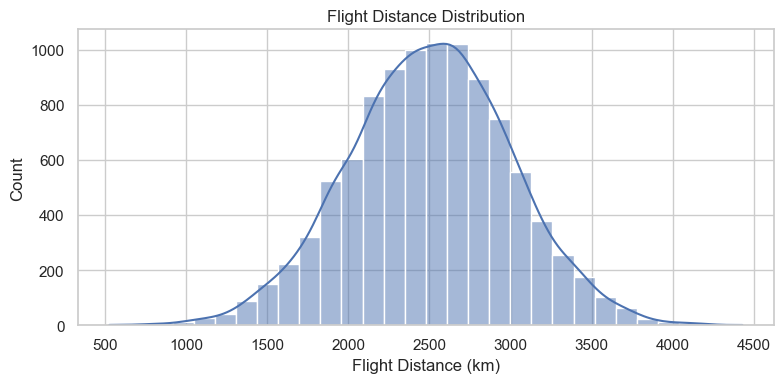

In [181]:
# 3. Flight Distance Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Flight_Distance_km'], bins=30, kde=True)
plt.title('Flight Distance Distribution')
plt.xlabel('Flight Distance (km)')
plt.tight_layout()
plt.show()

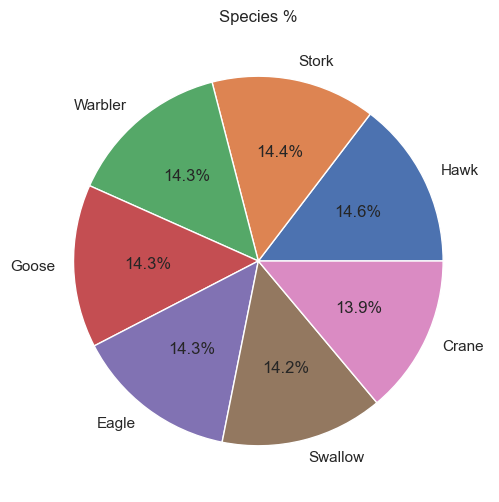

In [183]:
# 5. Tag Type Pie Chart
df['Species'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Species %')
plt.ylabel('')
plt.show()

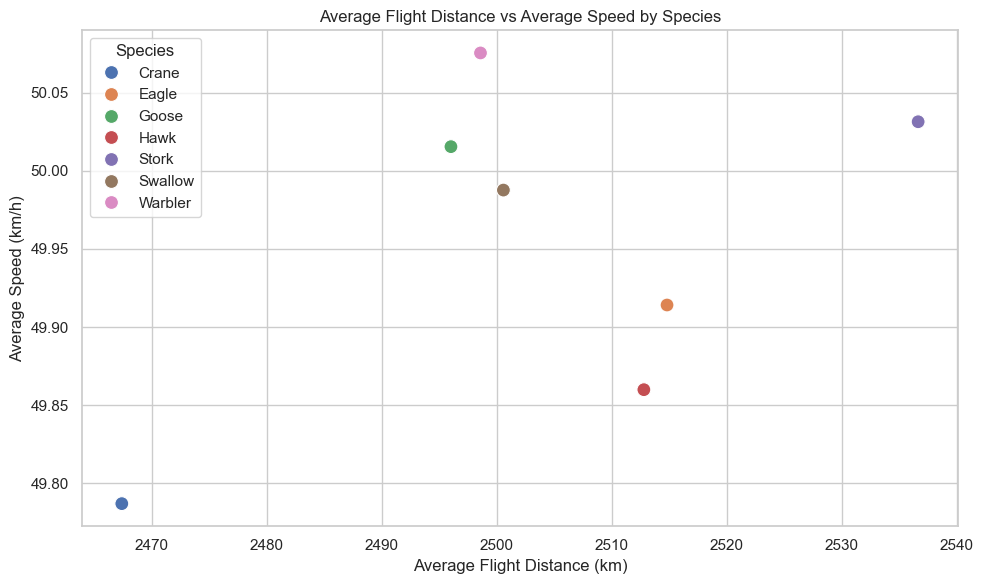

In [211]:
# ===== MULTIVARIATE ANALYSIS =====

# 6. Flight Distance vs Speed by Species
# Group by species and calculate the average speed and flight distance
avg_df = df.groupby('Species')[['Average_Speed_kmph', 'Flight_Distance_km']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_df, x='Flight_Distance_km', y='Average_Speed_kmph', hue='Species', s=100)
plt.title('Average Flight Distance vs Average Speed by Species')
plt.xlabel('Average Flight Distance (km)')
plt.ylabel('Average Speed (km/h)')
plt.tight_layout()
plt.show()


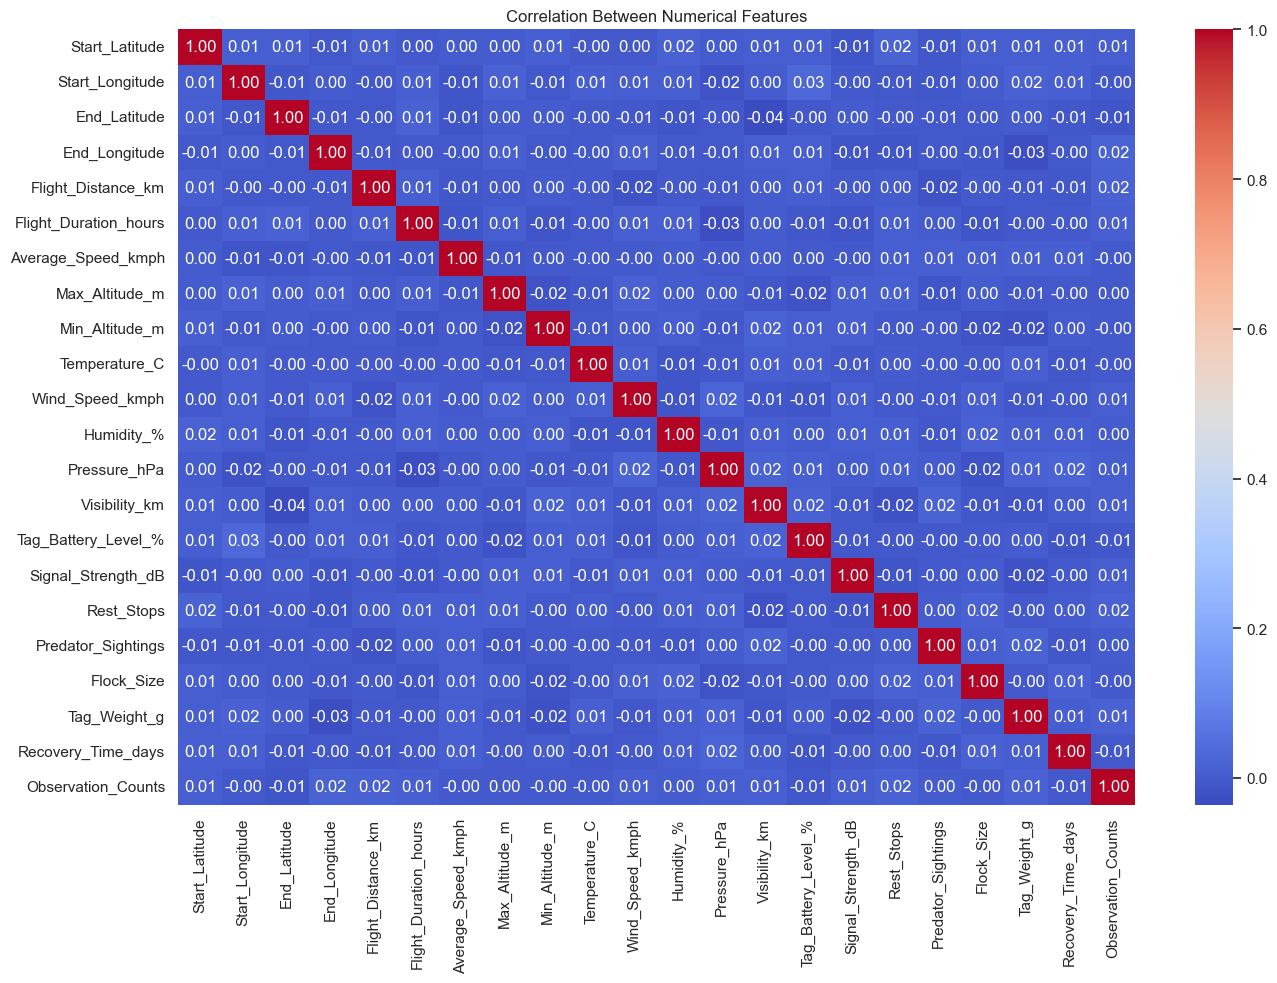

In [187]:
# 7. Correlation Heatmap
plt.figure(figsize=(14, 10))
num_cols = df.select_dtypes(include='number').corr()
sns.heatmap(num_cols, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()


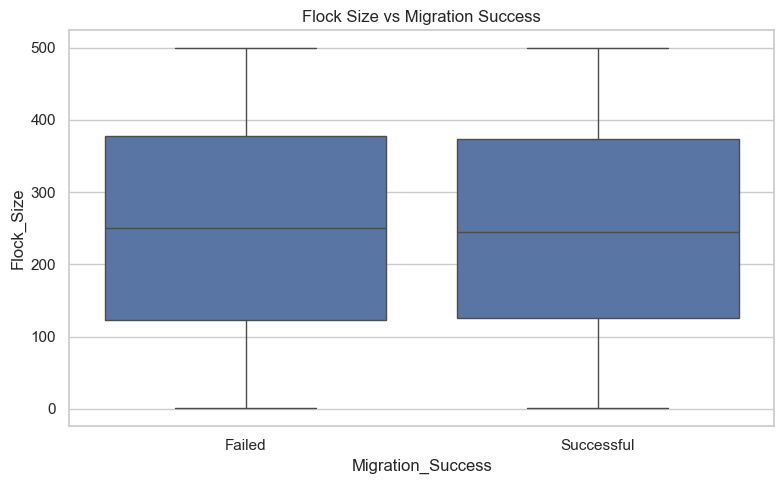

In [189]:
# 8. Flock Size vs Migration Success
plt.figure(figsize=(8, 5))
sns.boxplot(x='Migration_Success', y='Flock_Size', data=df)
plt.title('Flock Size vs Migration Success')
plt.tight_layout()
plt.show()


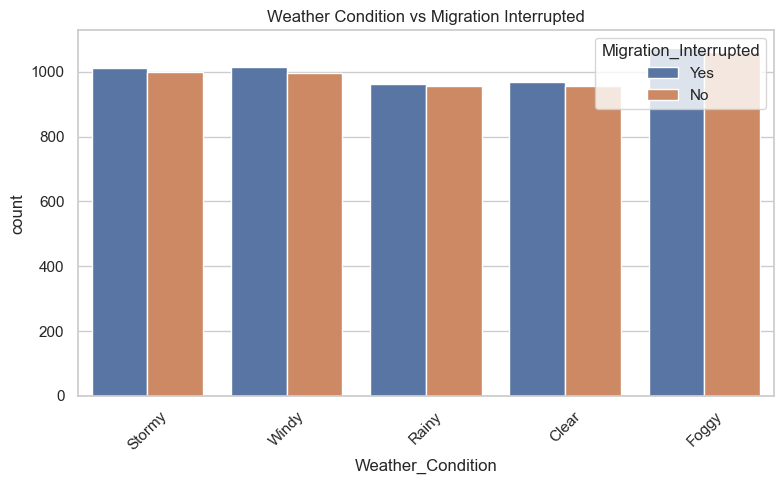

In [191]:
# 9. Weather vs Migration Interrupted
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Weather_Condition', hue='Migration_Interrupted')
plt.title('Weather Condition vs Migration Interrupted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


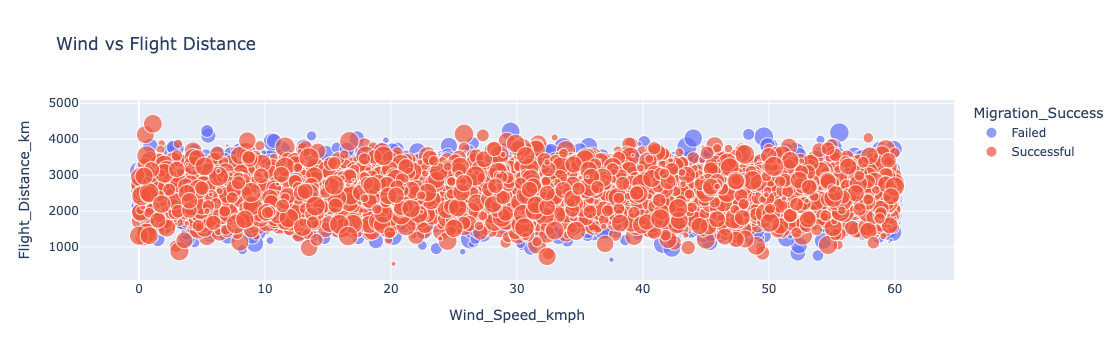

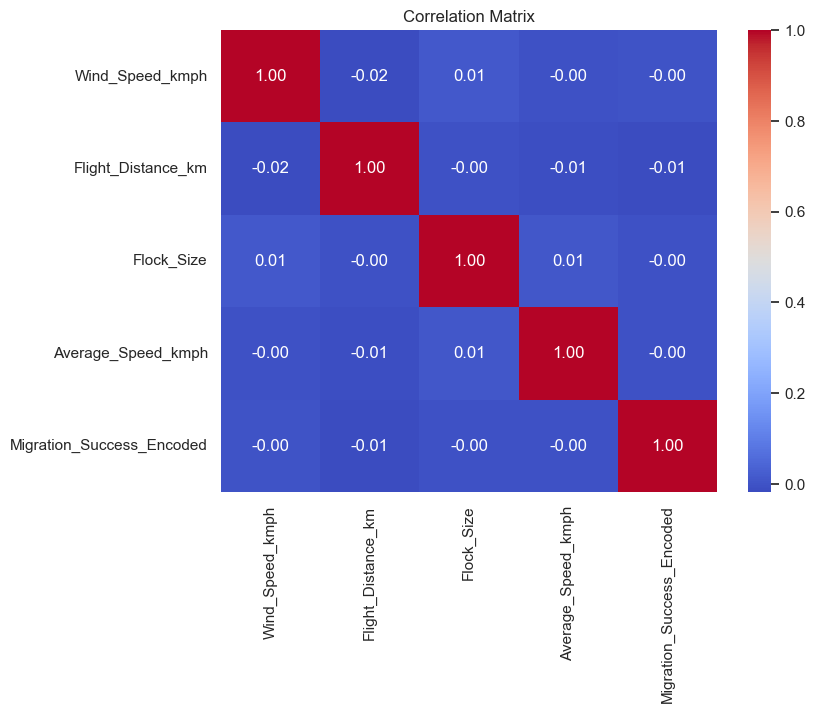

Correlation with Migration Success:

Migration_Success_Encoded    1.000000
Wind_Speed_kmph             -0.000539
Average_Speed_kmph          -0.003948
Flock_Size                  -0.004159
Flight_Distance_km          -0.014999
Name: Migration_Success_Encoded, dtype: float64


In [223]:
# 10. Flight Distance vs Wind Speed colored by Migration Success
fig = px.scatter(df, x='Wind_Speed_kmph', y='Flight_Distance_km',
                 color='Migration_Success', size='Flock_Size',
                 hover_data=['Species', 'Region'], title='Wind vs Flight Distance')
fig.show()

# Encode 'Migration_Success' as binary: Successful = 1, Failed = 0
df['Migration_Success_Encoded'] = df['Migration_Success'].map({'Successful': 1, 'Failed': 0})
corr_df = df[['Wind_Speed_kmph', 'Flight_Distance_km', 'Flock_Size', 'Average_Speed_kmph', 'Migration_Success_Encoded']]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
# Sort correlation with target
print("Correlation with Migration Success:\n")
print(corr_df.corr()['Migration_Success_Encoded'].sort_values(ascending=False))



In [194]:
print('Dataset shape:', df.shape)
print(df.head())

Dataset shape: (10000, 41)
  Bird_ID  Species         Region    Habitat Weather_Condition  \
0   B1000  Warbler  South America  Grassland            Stormy   
1   B1001    Stork  North America  Grassland            Stormy   
2   B1002     Hawk  South America   Mountain            Stormy   
3   B1003  Warbler  South America      Urban            Stormy   
4   B1004    Crane         Europe      Urban             Windy   

  Migration_Reason  Start_Latitude  Start_Longitude  End_Latitude  \
0          Feeding       11.906566      -169.378251     30.377647   
1         Breeding       62.301546      -111.475069     39.921092   
2  Avoid Predators       87.861164       -78.727327     66.990980   
3   Climate Change       35.770590       153.104341    -49.003145   
4  Avoid Predators      -21.611614       106.674824     11.681051   

   End_Longitude  ...  Tracking_Quality  Migration_Interrupted  \
0     -21.366879  ...         Excellent                    Yes   
1      47.963436  ...        

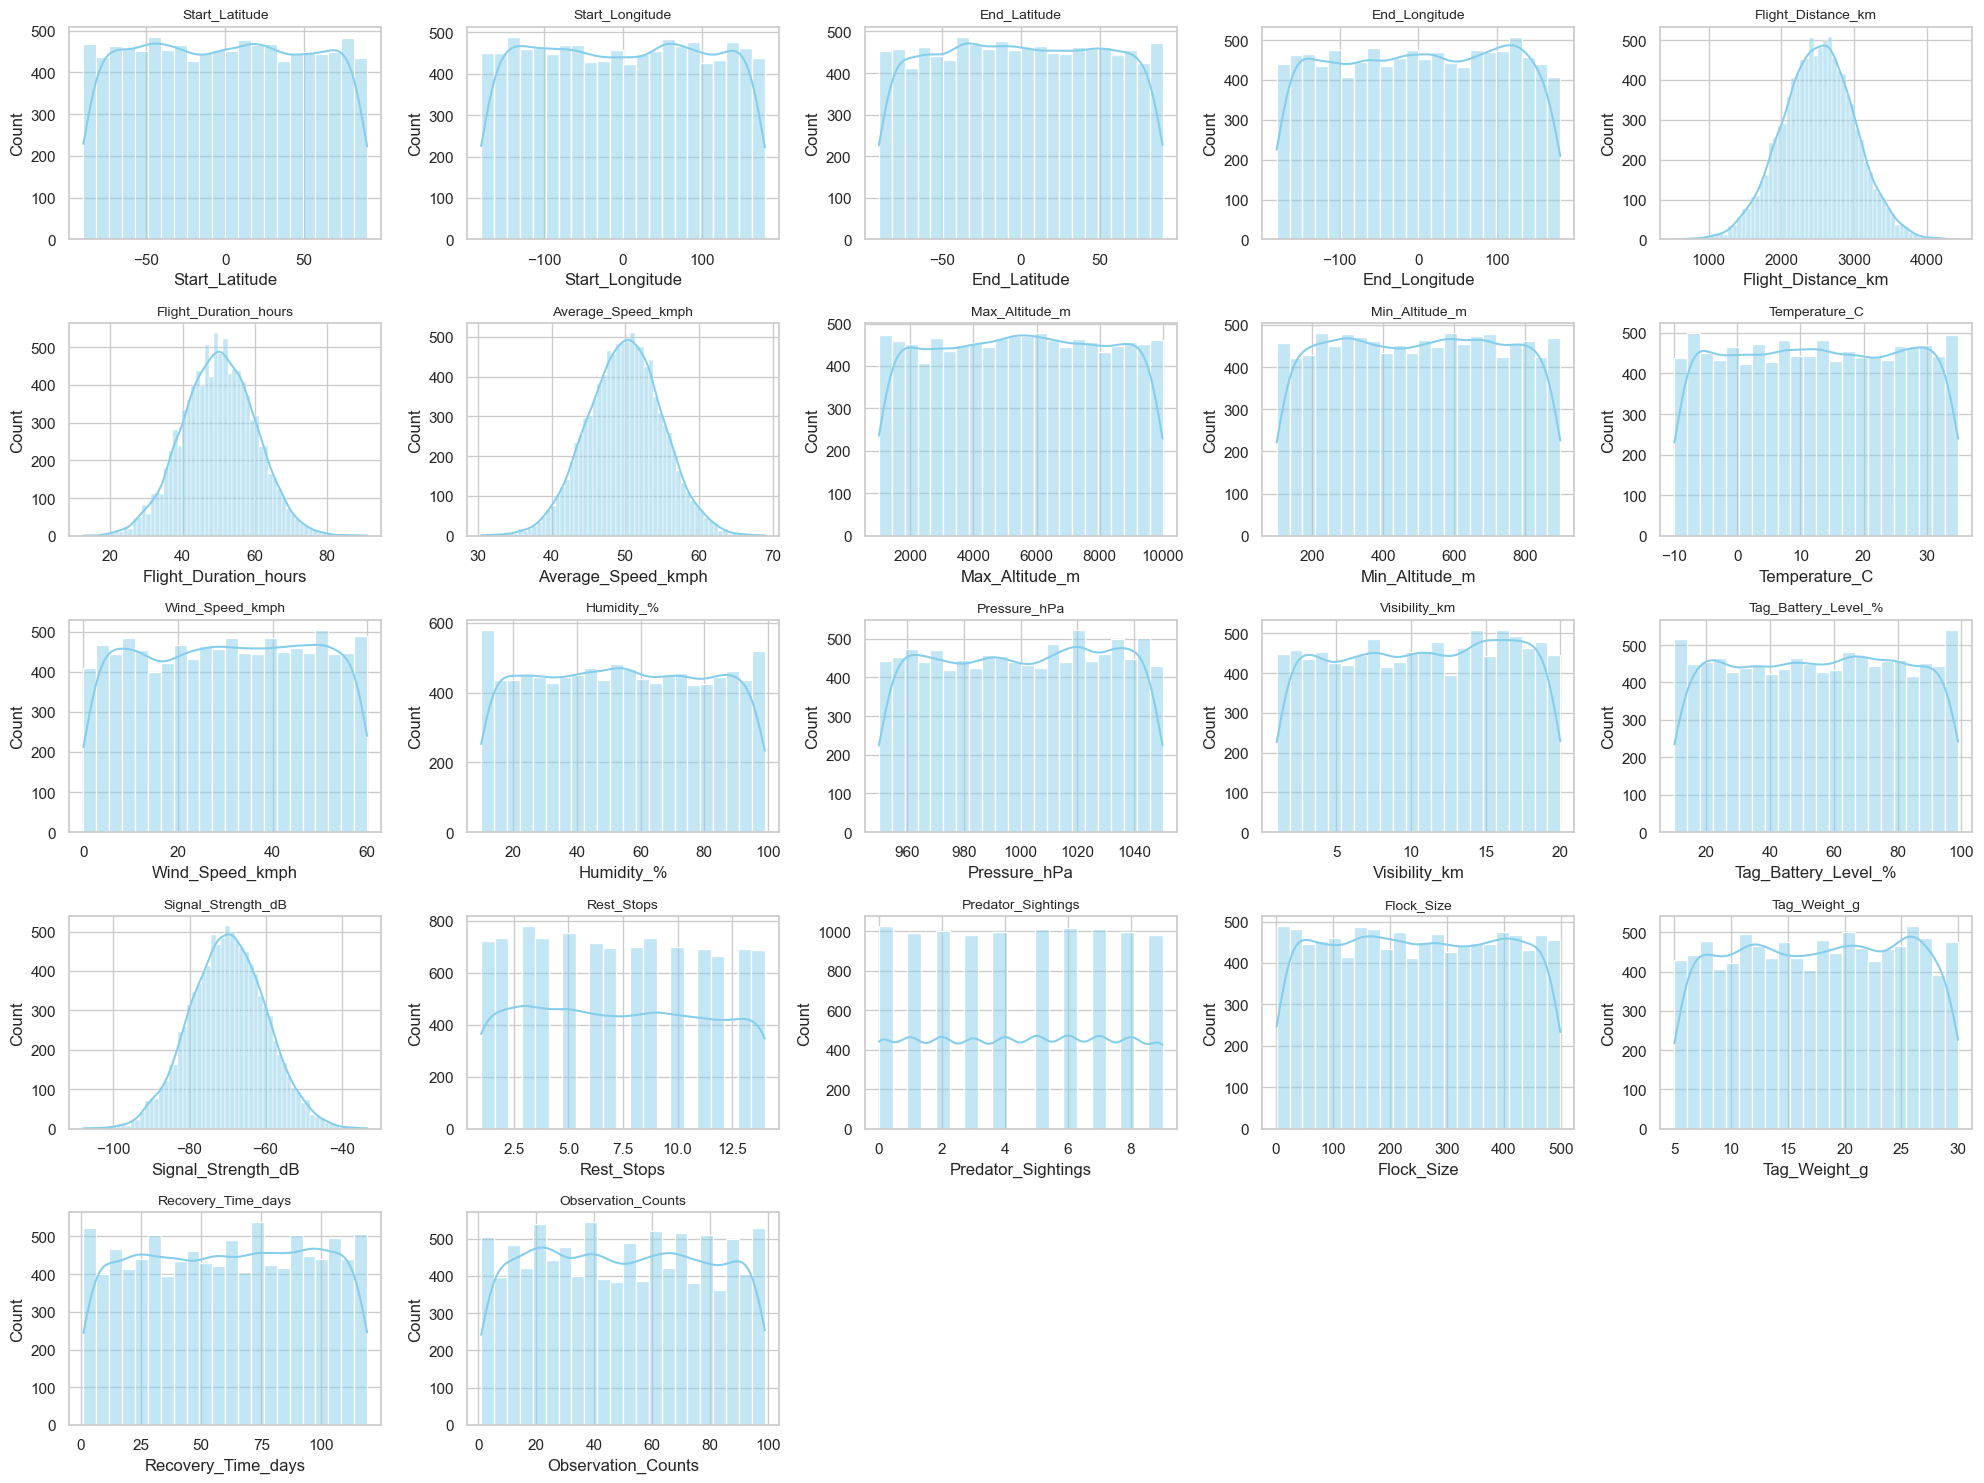

In [197]:
from math import ceil, sqrt

# Select numeric columns from the dataframe
numeric_df = df.select_dtypes(include=[np.number])
numeric_features = numeric_df.columns.tolist()
n_features = len(numeric_features)

# Dynamically determine grid size: We'll create a nearly square grid
cols = ceil(sqrt(n_features))
rows = ceil(n_features / cols)

plt.figure(figsize=(cols * 4, rows * 3))
for idx, feature in enumerate(numeric_features):
    ax = plt.subplot(rows, cols, idx + 1)
    sns.histplot(df[feature].dropna(), kde=True, color='skyblue', ax=ax)
    ax.set_title(feature, fontsize=10)
    plt.tight_layout()

plt.savefig('numeric_histograms.png')
plt.show()

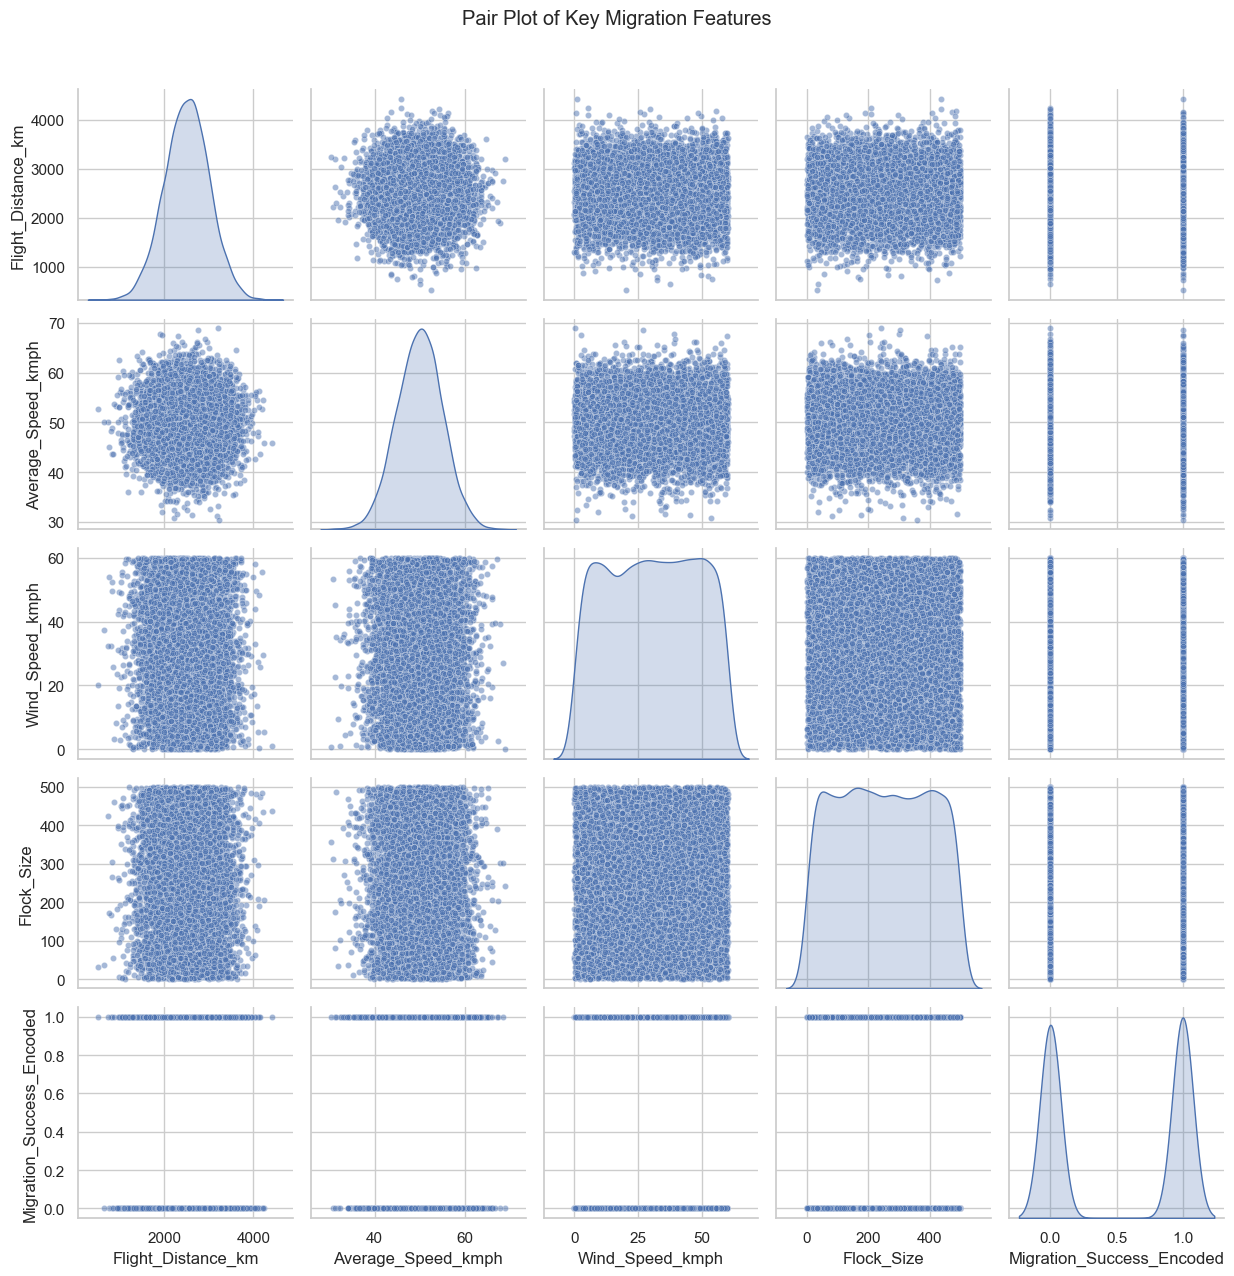

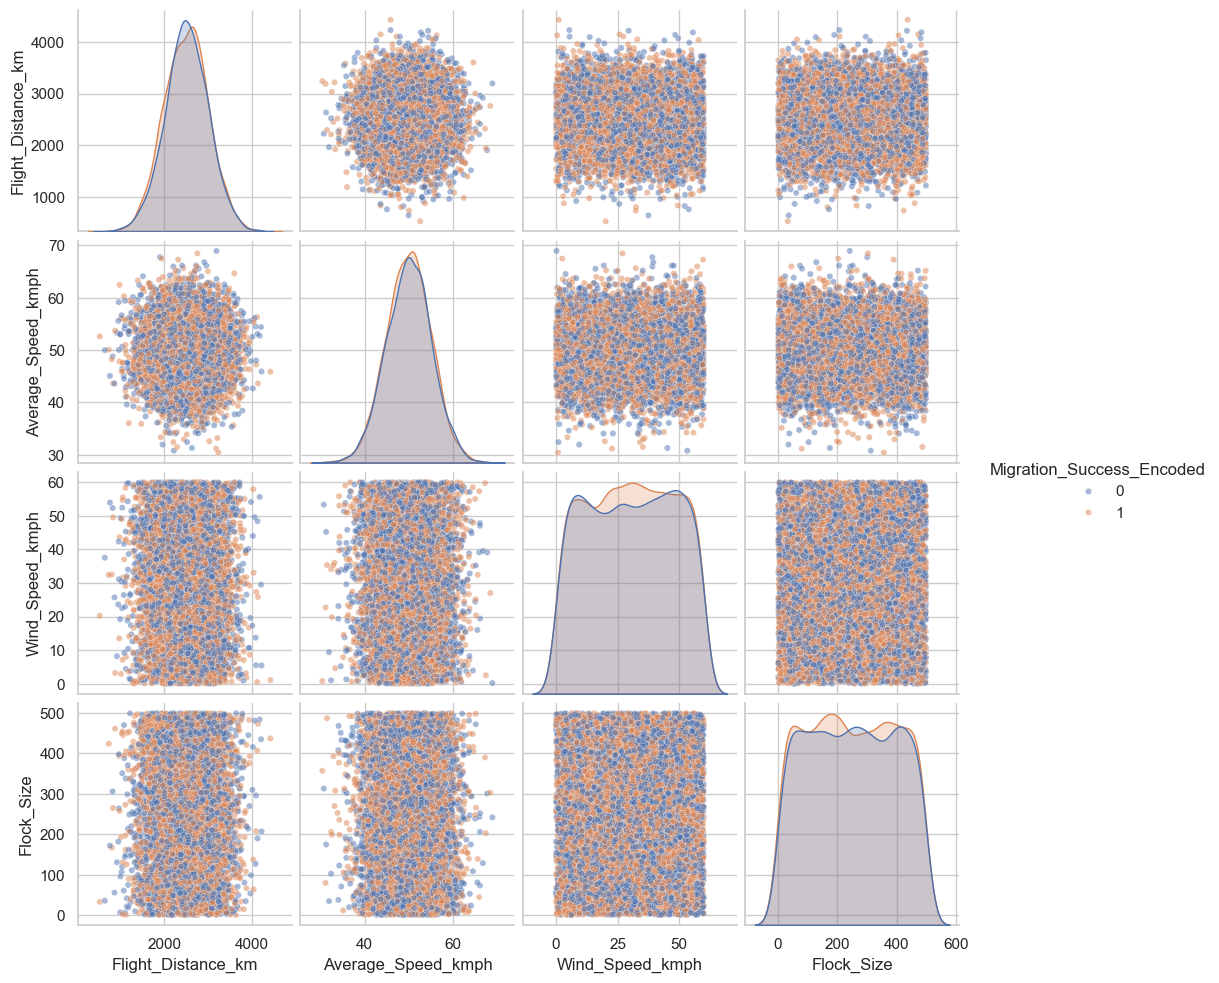

In [231]:
# Pair Plot for a subset of numeric features if too many exist

# subset_features = numeric_features[:3]  # Use first five numeric features for clarity
# if len(subset_features) > 1:
#     sns.pairplot(df[subset_features].dropna(), diag_kind='kde', plot_kws={'alpha': 0.6, 'color': 'skyblue'})
#     plt.suptitle('Pair Plot of Selected Numeric Features', y=1.02)
#     plt.savefig('pairplot_numeric_features.png')
#     plt.show()
# else:
#     print('Not enough numeric features for pair plot.')

selected_features = ['Flight_Distance_km', 'Average_Speed_kmph', 'Wind_Speed_kmph', 'Flock_Size', 'Migration_Success_Encoded']


# Ensure 'Migration_Success' is encoded
df['Migration_Success_Encoded'] = df['Migration_Success'].map({'Successful': 1, 'Failed': 0})

# Select relevant subset
subset = df[selected_features].dropna()

# Create better visual
sns.pairplot(subset, diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('Pair Plot of Key Migration Features', y=1.02)
plt.tight_layout()
plt.show()

sns.pairplot(df[selected_features], hue='Migration_Success_Encoded', diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})


In [199]:
# Predicting Migration Success
# In this section, we build a predictor to estimate the success of bird migration.
# Note: We assume that the target variable 'Migration_Success' is binary (e.g., 'Yes' or 'No').

# For Prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

if 'Migration_Success' in df.columns:
    # Prepare the dataset for classification
    data = df.copy()

    # We will use a subset of numeric features as predictors
    predictors = ['Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph', 
                  'Max_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph', 'Pressure_hPa', 'Visibility_km']
    
    # Drop rows with missing predictor values
    data = data.dropna(subset=predictors + ['Migration_Success'])
    
    # Convert target variable to binary (0 and 1). Here, we map the first encountered category to 0 and the other to 1.
    target_categories = data['Migration_Success'].cat.categories if data['Migration_Success'].dtype.name == 'category' else data['Migration_Success'].unique()
    if len(target_categories) == 2:
        mapping = {target_categories[0]: 0, target_categories[1]: 1}
        data['Migration_Success_Bin'] = data['Migration_Success'].map(mapping)
    else:
        print('Migration_Success does not appear to be binary. Unable to proceed with logistic regression predictor.')
        data['Migration_Success_Bin'] = 0  # default fallback

    X = data[predictors]
    y = data['Migration_Success_Bin']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Build a logistic regression model
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f'Prediction Accuracy: {acc:.2f}')
    


Prediction Accuracy: 0.50


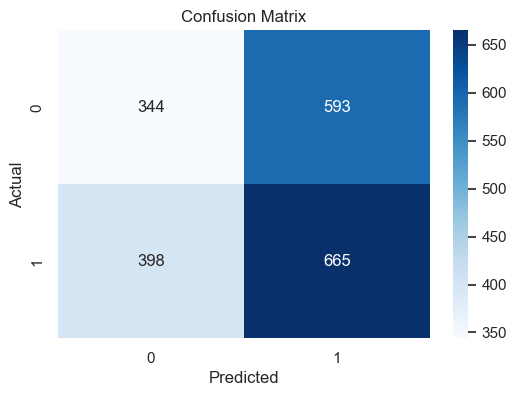

In [200]:
    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix.png')
    plt.show()

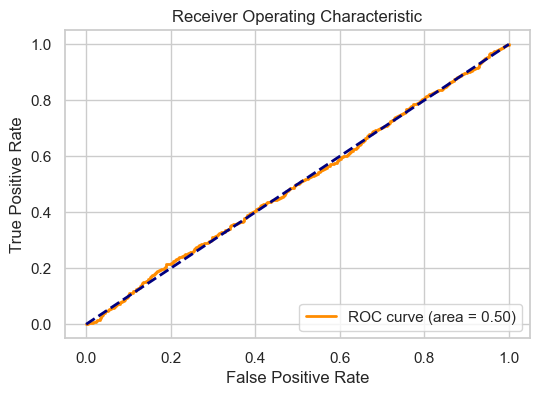

In [201]:
    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.savefig('roc_curve.png')
    plt.show()



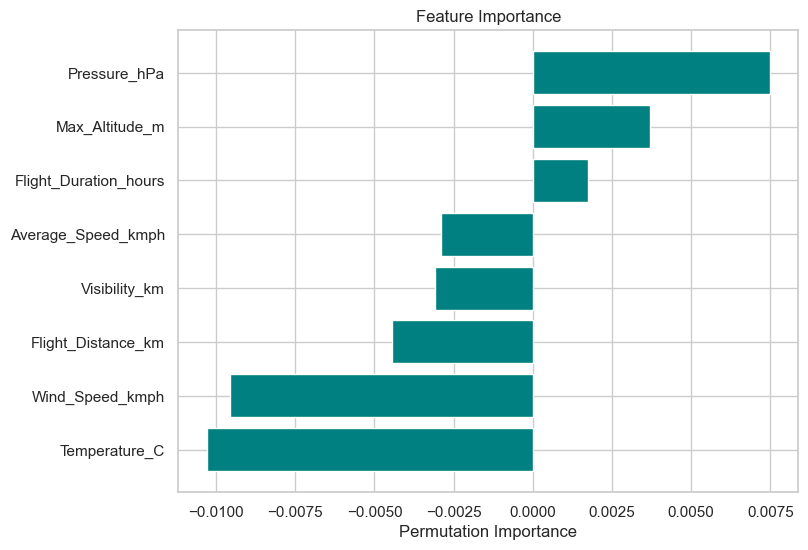

In [202]:
# Check if 'Migration_Success' column exists before running permutation importance
if 'Migration_Success' in df.columns:
    # Permutation Importance (simple illustration)
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()

    plt.figure(figsize=(8, 6))
    plt.barh(np.array(predictors)[sorted_idx], perm_importance.importances_mean[sorted_idx], color='teal')
    plt.xlabel('Permutation Importance')
    plt.title('Feature Importance')
    plt.savefig('permutation_importance.png')
    plt.show()
else:
    print('Migration_Success column not found. Skipping prediction section.')


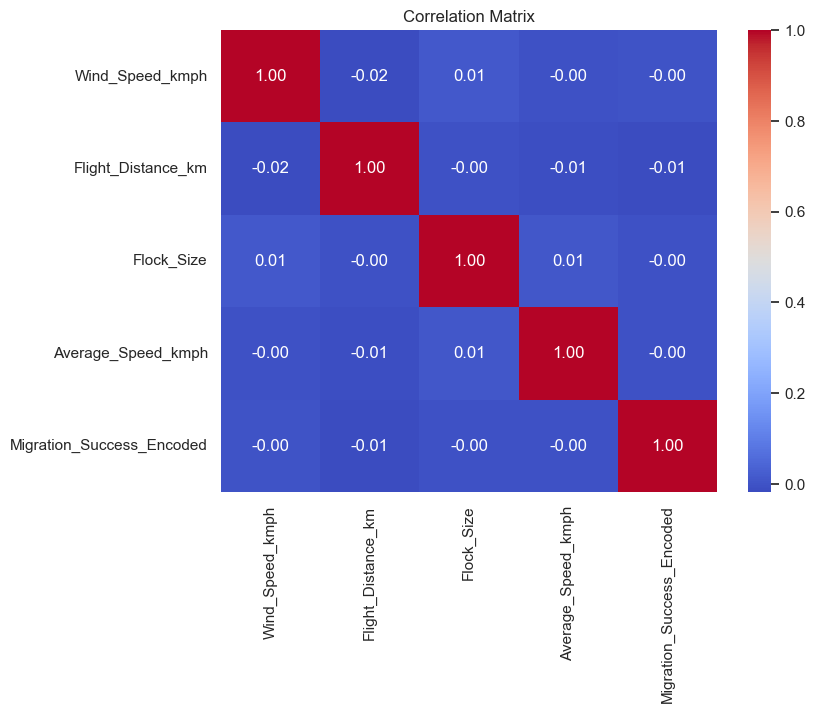

Correlation with Migration Success:

Migration_Success_Encoded    1.000000
Wind_Speed_kmph             -0.000539
Average_Speed_kmph          -0.003948
Flock_Size                  -0.004159
Flight_Distance_km          -0.014999
Name: Migration_Success_Encoded, dtype: float64
